In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
training = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([training,test])

%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

**Visualizing the Data**

In [3]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [4]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [5]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


<Axes: xlabel='Sex'>

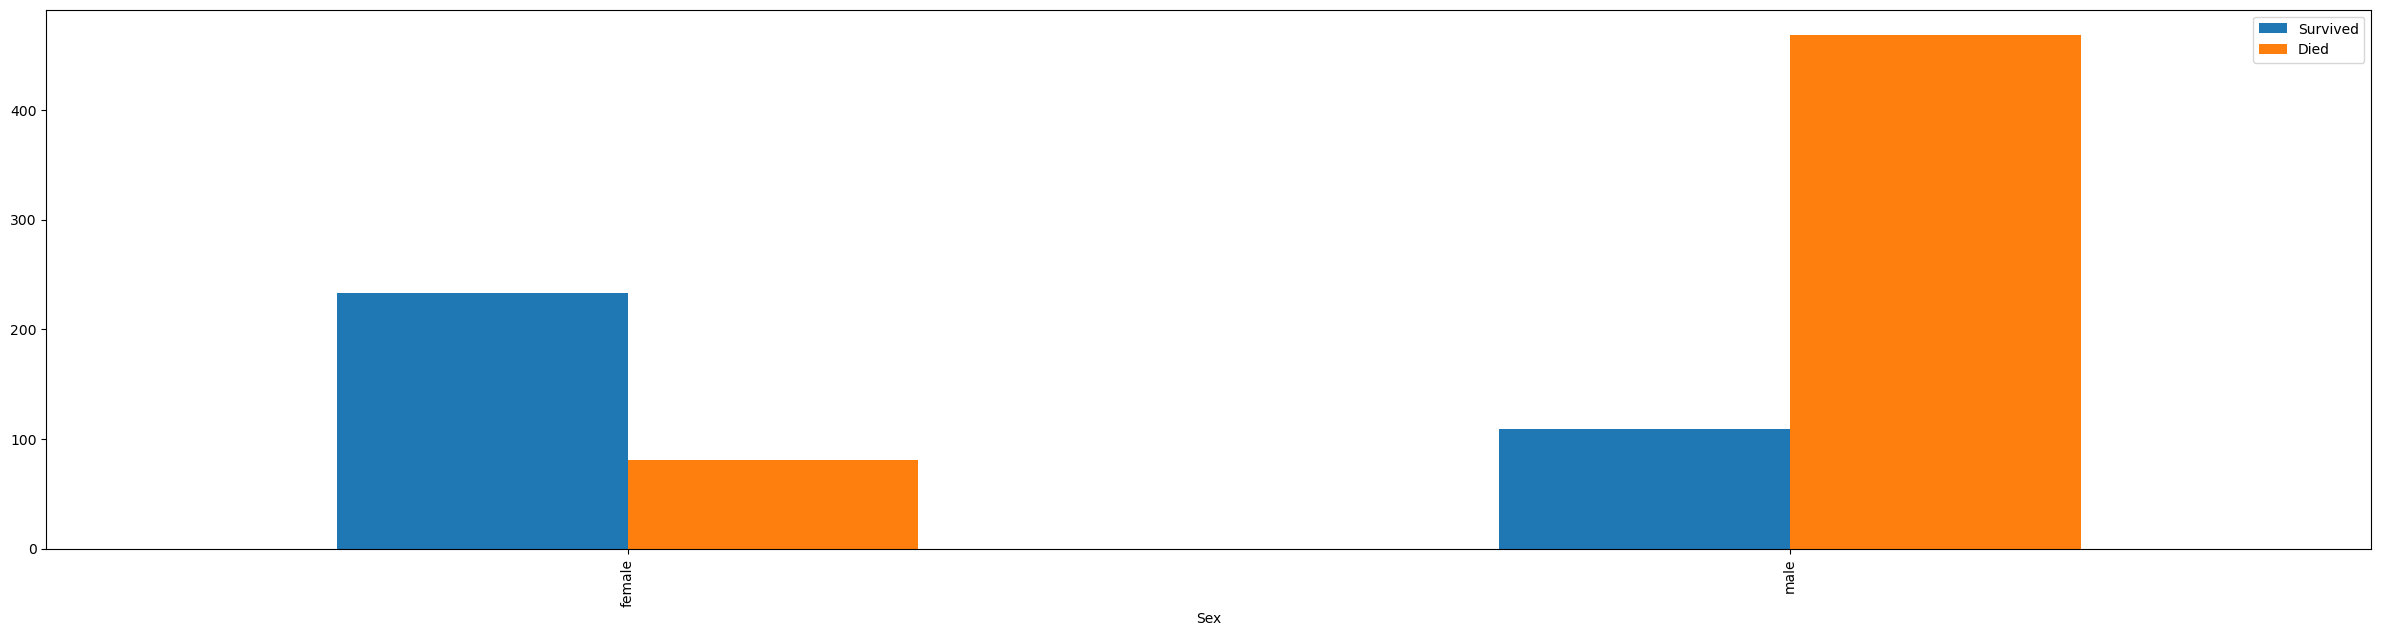

In [6]:
training['Died']=1- training['Survived']
training.groupby('Sex')[['Survived','Died']].sum().plot(kind='bar',figsize=(30, 7))

**Project Planning:**

For successfull Machine Learning, Data processing is a vital part of the project. Giving the model good data to work with will be the first major step.
Firstly, cleaning up the data and then doing some feature engineering


Firstly let's look at possible categories to lump together
(I lost my progess of my first day of work due to Kaggle not saving my notebook, hence I will recap what I did but not go into as much detail)


In [7]:
print(pd.pivot_table(training, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print('---------------------------------')
print(pd.pivot_table(training, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print('---------------------------------')
print(pd.pivot_table(training, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))
training['CabinComb'] = training.Cabin.apply(lambda x: str(x)[0])
print('---------------------------------')
print(training.CabinComb.value_counts())
pd.pivot_table(training,index='Survived',columns='CabinComb', values = 'Name', aggfunc='count')
print('---------------------------------')

i = 0
j = 0
while i <= 195:
    i += 15
    training['Cabin' + str(i)] = training['Cabin'].iloc[j:i]
    #print(pd.pivot_table(training,index='Survived',columns='Cabin' + str(i), values = 'Name', aggfunc='count'))
    print('---------------------------------')
 
def extract_cabin_num(cabin):
    if isinstance(cabin, str):
        cabin_num = cabin.split()[0][1:]  
        if cabin_num.isdigit():
            return int(cabin_num)
    return None

def categorize_cabin_smaller_33(cabin_num):
    if cabin_num is not None and cabin_num < 33:
        return 'Yes'
    return 'No'

def categorize_cabin_33_66(cabin_num):
    if cabin_num is not None and 33 <= cabin_num <= 66:
        return 'Yes'
    return 'No'

def categorize_cabin_bigger_66(cabin_num):
    if cabin_num is not None and cabin_num > 66:
        return 'Yes'
    return 'No'

training['CabinNum'] = training['Cabin'].map(extract_cabin_num)

training['Cabin_0_33'] = training['CabinNum'].map(categorize_cabin_smaller_33)
training['Cabin_33_66'] = training['CabinNum'].map(categorize_cabin_33_66)
training['Cabin_66'] = training['CabinNum'].map(categorize_cabin_bigger_66)


print(pd.pivot_table(training,index='Survived',columns='Cabin_0_33', values = 'Name', aggfunc='count'))
print('---------------------------------')
print(pd.pivot_table(training,index='Survived',columns='Cabin_33_66', values = 'Name', aggfunc='count'))
print('---------------------------------')
print(pd.pivot_table(training,index='Survived',columns='Cabin_66', values = 'Name', aggfunc='count'))
print('---------------------------------')

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
---------------------------------
Sex       female  male
Survived              
0             81   468
1            233   109
---------------------------------
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217
---------------------------------
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: CabinComb, dtype: int64
---------------------------------
---------------------------------
---------------------------------
---------------------------------
---------------------------------
---------------------------------
---------------------------------
---------------------------------
---------------------------------
---------------------------------
---------------------------------
---------------------------------
---------------------------------
---------------------------------
---------------------------------
Cabin

Cabins sharing a letter can be combined as they share similar postions on the ship